Student Name:
Student ID:

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [5]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [4]:
a_x = 0.05
a_y= 10

In [6]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [7]:
print (data.shape)
print (data)

(20, 2)
[[ 0.         -4.47486838]
 [ 0.98123426  5.19633353]
 [ 1.97430116  9.46083104]
 [ 3.04784878 14.90114796]
 [ 4.06430319 18.98621909]
 [ 4.9488205  18.95737004]
 [ 5.88523145 21.10055316]
 [ 7.00112891 25.50299491]
 [ 8.1311536  32.55682855]
 [ 8.86105657 35.7805234 ]
 [ 9.92343346 40.53317222]
 [10.93522528 48.95336523]
 [11.81243101 46.41650324]
 [13.12689654 54.49028051]
 [14.16611381 60.33345459]
 [15.06718061 61.70099637]
 [16.27860729 66.14034024]
 [16.72397682 67.13219655]
 [17.93406676 68.57758743]
 [19.2756039  77.26360553]]


In [8]:
class my_PCA():
    def __init__(self, n_components=None, ):
        self.n_components = n_components
        self.components_ = np.ndarray
        self.mean_ = np.ndarray

    def fit(self, X, y=None):
        self.mean_ = np.mean(X, axis=0)
        X = X - self.mean_
        #    Factors the matrix X as U * np.diag(S) * V, where U and V
        #   are unitary and S is a 1-d array of X's singular values.
        U, S, V = np.linalg.svd(X, full_matrices=False)
        U, V = self.u_v_manage(U, V)
        self.components_ = V[:self.n_components]
        return self

    def transform(self, X):
        if self.mean_ is not None:
            X = X - self.mean_

        X = np.dot(X, self.components_.T)
        return X

    def u_v_manage(self, u, v, u_based_decision=True):
        u = np.array(u)
        v = np.array(v)
        if u_based_decision:
            # columns of u, rows of v
            # get max of every comp
            max_abs_cols = np.array(np.argmax(np.abs(u), axis=0))[0]
            # get signs
            signs = np.array(np.sign(u[max_abs_cols, range(u.shape[1])]))[0]
            u *= signs
            v *= np.expand_dims(signs, axis=1)
        else:
            # rows of v, columns of u
            max_abs_rows = np.argmax(np.abs(v), axis=1)
            signs = np.sign(v[range(v.shape[0]), max_abs_rows])
            u *= signs
            v *= signs[:, np.newaxis]
        return u, v

In [9]:
pca = PCA(n_components=1)
pca.fit(data)
component = pca.components_
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)
print('component\n', component)

component
 [[-0.23813881 -0.97123113]]


In [10]:
my_pca = my_PCA(n_components=1)
my_pca.fit(data)
my_component = my_pca.components_
my_data_pca = my_pca.transform(data)
print('my component\n',my_component)

my component
 [[-0.23813881 -0.97123113]]


C:\Users\tienial1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


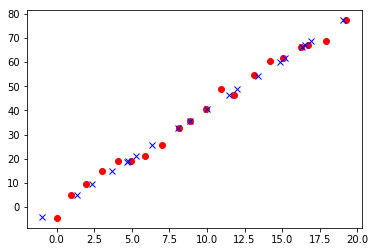

In [11]:
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()